Code without visible output:

In [0]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



(a)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



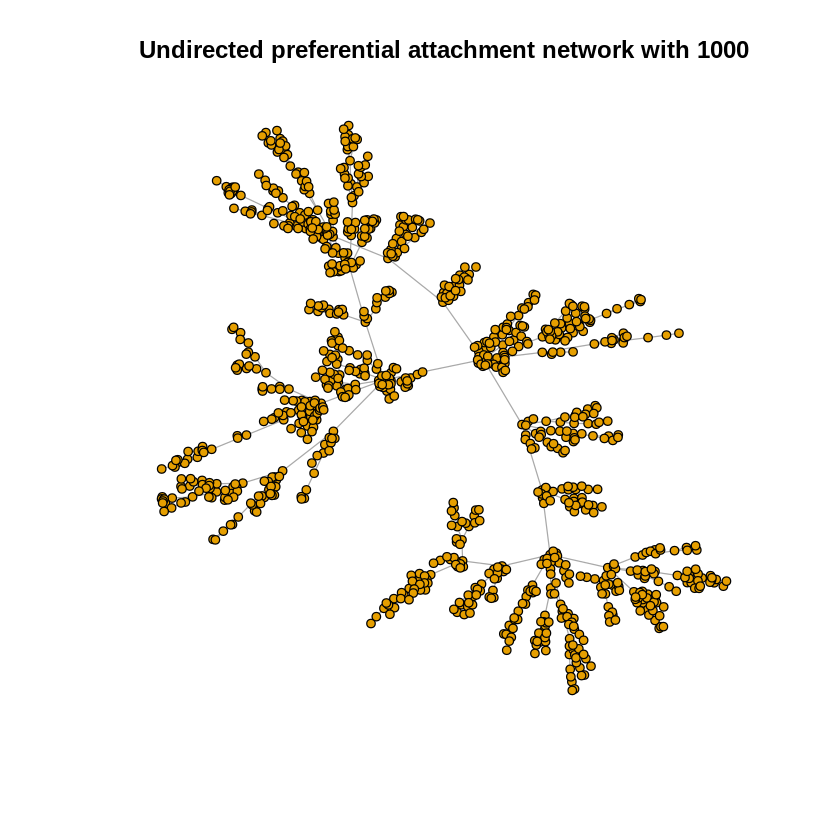

In [2]:
library ("igraph")
set.seed(0)
g1 = barabasi.game(1000, m=1, directed=F)
g1 = set.graph.attribute(g1, "layout", layout.fruchterman.reingold(g1))
plot(g1,vertex.size=3,vertex.label=NA,main="Undirected preferential attachment network with 1000")

(b)

[1] 100 149

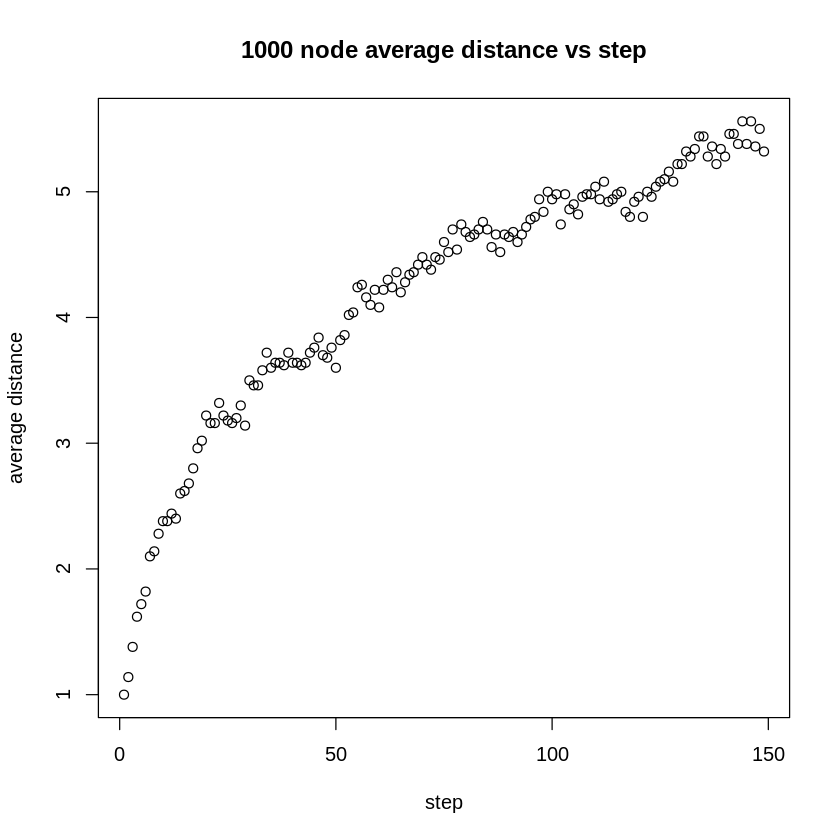

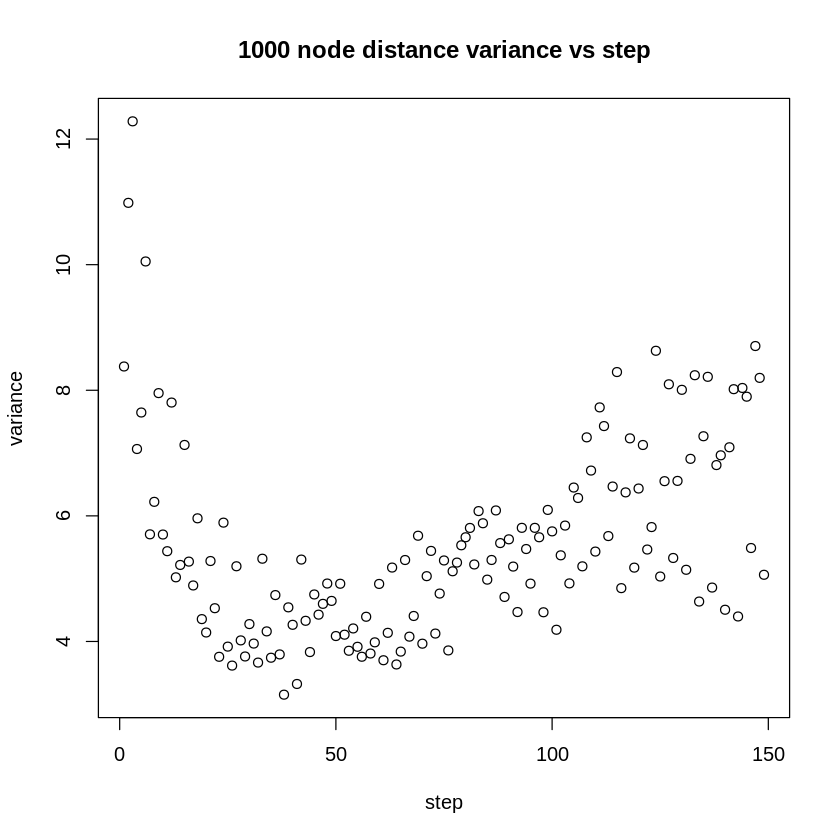

In [3]:
# pick 100 randomly chosen starting nodes, and let each take 149 steps of random walk
m=matrix(data=0,nrow=100,ncol=150)
for(i in 1:100){
smpl <- sample(1:vcount(g1),1)  
w = random_walk(g1,smpl,150)
m[i,]=w
}
Distance=matrix(data=0,nrow=100,ncol=149)
for(i in 1:100){
Distance[i,]=distances(g1,v=m[i,2:150],to=m[i,1])
}
dim(Distance)
mean_s=colMeans(Distance)
variance_s=colMeans((Distance-mean_s)^2)
x=seq(from=1, to=149,by=1)
plot(x,mean_s,main="1000 node average distance vs step",xlab="step",ylab="average distance")
plot(x,variance_s,main="1000 node distance variance vs step",xlab="step",ylab="variance")

(c)

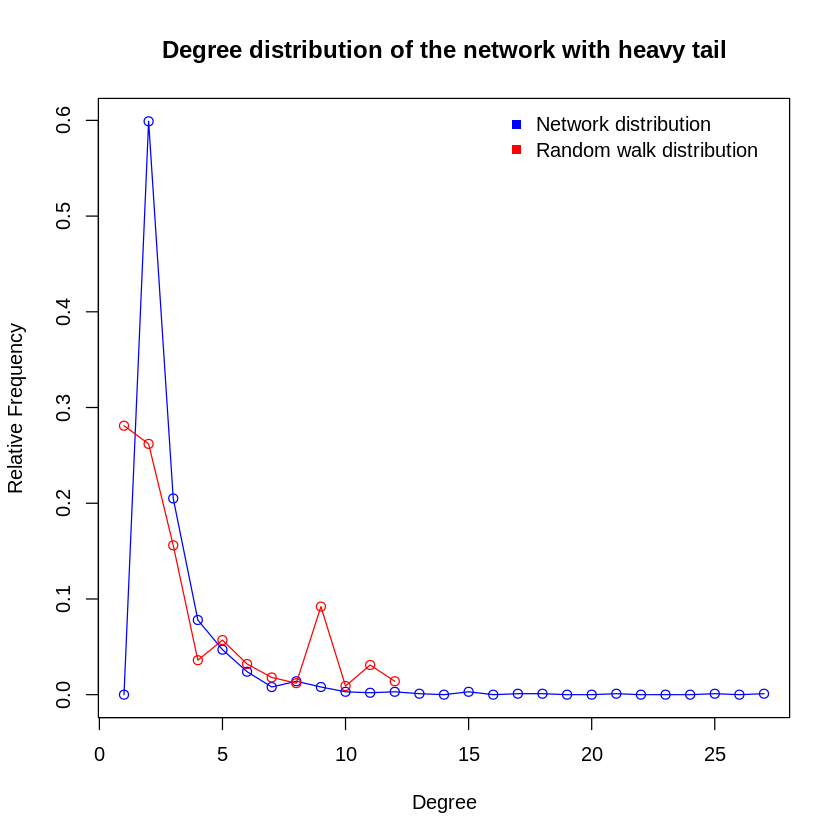

In [4]:
plot(degree.distribution(g1),main="Degree distribution of the network with heavy tail",xlab="Degree",ylab="Relative Frequency",col="blue")
lines(degree.distribution(g1),col="blue")

# sample random initial point
smpl2= sample(1:vcount(g1),1)  
# do a random wlk of step 1000
w2 = random_walk(g1,smpl2,1000)
# get node degree frequency of nodes encountered in random walk
w2_freq=table(degree(g1,v=w2))
# convert frequency table into vector
w2_freq_vector=rep(w2_freq)
# get relative frequency
w2_freq_vector=w2_freq_vector/sum(w2_freq_vector)
# plot in existing plot
points(w2_freq_vector,col="red")
lines(w2_freq_vector,col="red")

legend("topright",legend=c("Network distribution","Random walk distribution"),pch=15,col=c("blue","red"),bty="n")

(d)

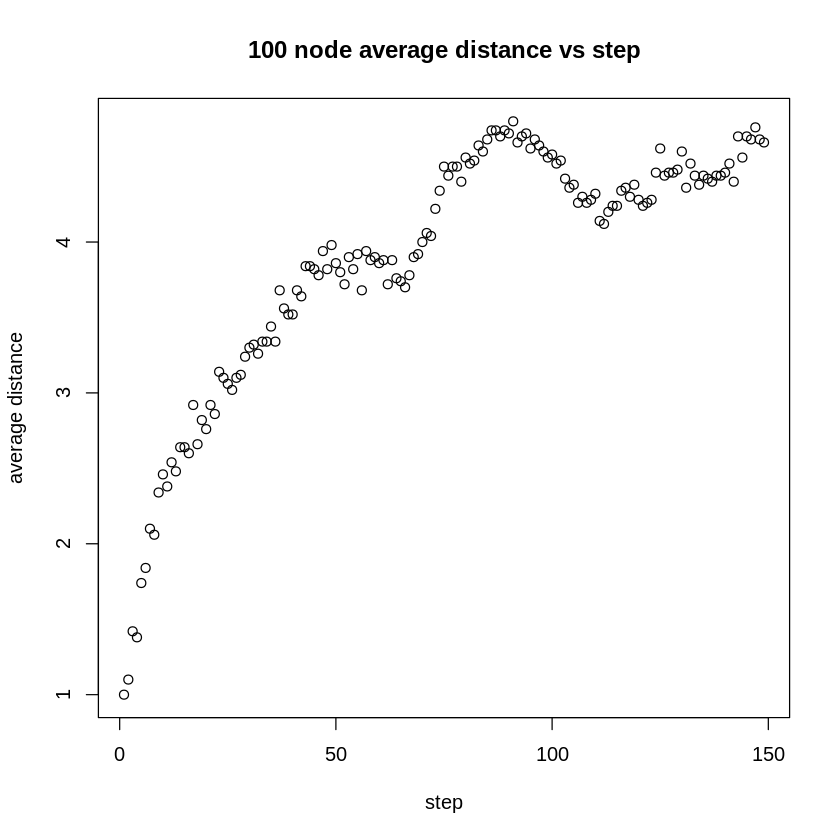

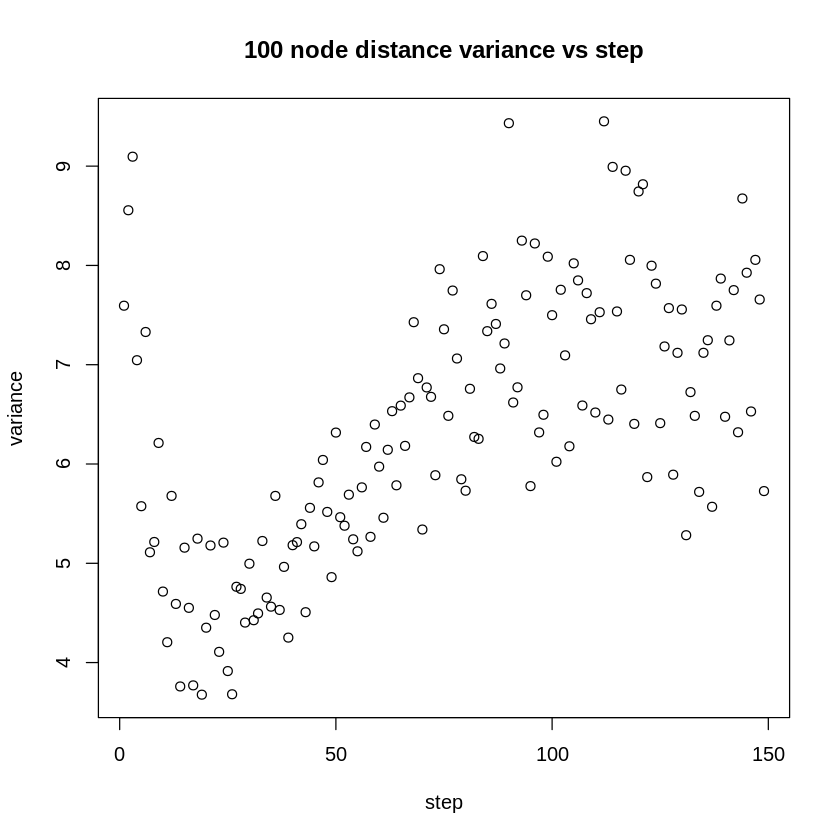

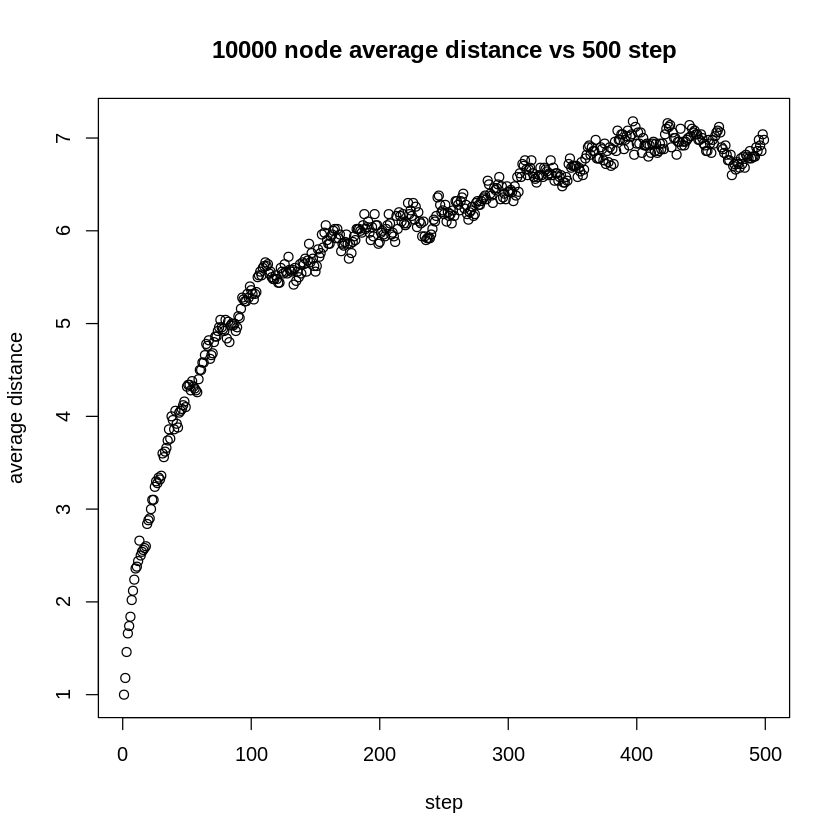

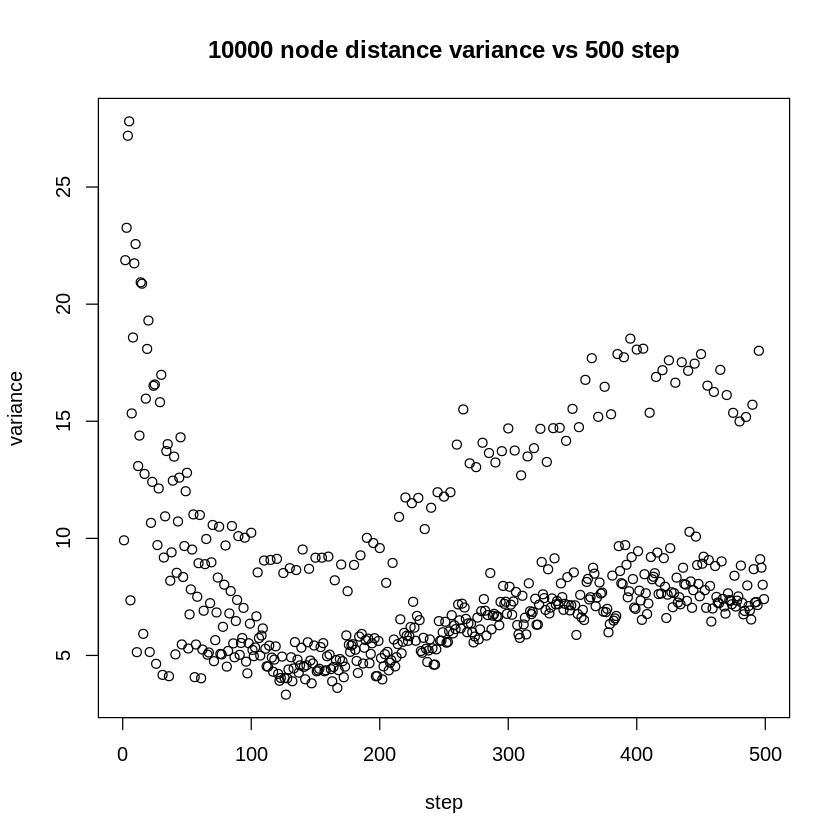

In [5]:
g2 = barabasi.game(100, m=1, directed=F)
g3 = barabasi.game(10000, m=1, directed=F)

Paths_100=matrix(data=0,nrow=100,ncol=150)
for(i in 1:100){
smpl_100 <- sample(1:vcount(g2),1)  
walk = random_walk(g2,smpl_100,150)
Paths_100[i,]=walk
}
Distance2=matrix(data=0,nrow=100,ncol=149)
for(i in 1:100){
Distance2[i,]=distances(g2,v=Paths_100[i,2:150],to=Paths_100[i,1])
}
mean_distance_100=colMeans(Distance2)
variance_100=colMeans((Distance2-mean_distance_100)^2)

plot(x,mean_distance_100,main="100 node average distance vs step",xlab="step",ylab="average distance")
plot(x,variance_100,main="100 node distance variance vs step",xlab="step",ylab="variance")

Paths_10000=matrix(data=0,nrow=100,ncol=500)
for(i in 1:100){
smpl_10000 <- sample(1:vcount(g3),1)  
walk = random_walk(g3,smpl_10000,500)
Paths_10000[i,]=walk
}
Distance3=matrix(data=0,nrow=100,ncol=499)
for(i in 1:100){
Distance3[i,]=distances(g3,v=Paths_10000[i,2:500],to=Paths_10000[i,1])
}
mean_distance_10000=colMeans(Distance3)
variance_10000=colMeans((Distance3-mean_distance_10000)^2)
x=seq(from=1, to=499,by=1)
plot(x,mean_distance_10000,main="10000 node average distance vs 500 step",xlab="step",ylab="average distance")
plot(x,variance_10000,main="10000 node distance variance vs 500 step",xlab="step",ylab="variance")